In [1]:
import pandas as pd
import TumorDecon as td
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

Not entirley sure what Im supposed to do with this data

In [167]:
human_expression = pd.read_excel("../data/HS_CPM_withNames.xlsx",index_col="Gene Name")
del human_expression['log2 SNU2D3/SNU']
del human_expression['log2 SNU1F5/SNU']
del human_expression['log2 NCIBAP1/NCIEV']
del human_expression['NCIBAP1/NCIEV']
del human_expression['SNU1F5/SNU']
del human_expression['SNU2D3/SNU']
del human_expression['Ensembl ID']
human_expression.columns = ['SNU_Original_cell_line', "SNU_KO1", "SNU_KO2","NCI_BAP1_-1","NCI_BAP1_0"]
human_expression.head()

,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
Gene Name,,,,,
A1BG-AS1,0.117659,0.061119,0.000000,0.983894,1.856214
A2M,0.705952,1.650205,0.640537,1.665051,2.397610
A4GALT,14.942642,4.645022,1.537288,4.238311,5.645984
AAAS,49.475440,40.154990,64.886363,47.151212,48.261559
AACS,31.356016,30.070403,26.646325,36.555434,32.561084


In [168]:
mouse_espression = pd.read_excel("../data/MUS_CPM_results.xlsx",index_col="Gene Name")
del mouse_espression['Ensembl ID']
del mouse_espression['B162E10/B16']
del mouse_espression['B164F7/B16']
del mouse_espression['log2 B162E10/B16']
del mouse_espression['log2 B164F7/B16']
mouse_espression.index = mouse_espression.index.str.upper()
mouse_espression.head()

,B162E10,B164F7,B16
Gene Name,,,
0610009B22RIK,41.980013,64.710011,62.608110
0610009E02RIK,0.526725,1.370975,1.811577
0610009L18RIK,2.001556,3.290340,2.898524
0610010F05RIK,39.451732,50.246227,57.680620
0610010K14RIK,0.737416,0.411292,0.507242


In [4]:
mouse_espression = td.df_normalization(mouse_espression,"minmax")

In [169]:
combined_df = mouse_espression.merge(human_expression,on="Gene Name")
combined_df.head()

,B162E10,B164F7,B16,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
Gene Name,,,,,,,,
AAAS,80.641657,59.637405,70.289198,49.475440,40.154990,64.886363,47.151212,48.261559
AACS,44.086915,25.225937,22.463558,31.356016,30.070403,26.646325,36.555434,32.561084
AAGAB,60.152039,66.629376,69.564567,53.299344,58.551720,47.335659,122.986708,99.075412
AAK1,143.111288,90.004497,137.679872,22.119816,38.871497,35.613838,41.474902,34.958693
AAMDC,3.845095,5.004058,4.710101,7.765467,4.400547,3.394844,5.449257,4.872561


In [6]:
print(human_expression.shape,mouse_espression.shape,combined_df.shape)

(16443, 5) (14702, 3) (10356, 8)


## Human Analysis

In [7]:
human_expression = td.df_normalization(human_expression,"minmax")
human_expression.head()

,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
Gene Name,,,,,
A1BG-AS1,0.000005,0.000003,0.000000,0.000054,0.000131
A2M,0.000031,0.000091,0.000056,0.000091,0.000169
A4GALT,0.000665,0.000256,0.000134,0.000232,0.000397
AAAS,0.002200,0.002209,0.005648,0.002577,0.003396
AACS,0.001394,0.001654,0.002319,0.001998,0.002292


In [8]:
human_variance_threshold = td.variance_threshold_selector(human_expression,threshold=.002)
human_variance_threshold.head()

,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
Gene Name,,,,,
ACTB,0.197747,0.401092,0.720055,0.184780,0.320531
ACTG1,0.105288,0.207118,0.305864,0.127543,0.207452
ACTN4,0.046267,0.061848,0.181703,0.036293,0.060467
ANXA2,0.113176,0.138027,0.184257,0.186264,0.306619
B2M,0.062877,0.070103,0.027179,0.232167,0.309063


In [9]:
print(human_expression.shape,human_variance_threshold.shape)

(16443, 5) (41, 5)


In [10]:
print(human_variance_threshold.index)

Index(['ACTB', 'ACTG1', 'ACTN4', 'ANXA2', 'B2M', 'CCDC80', 'EEF1A1', 'EEF2',
       'ENO1', 'FLNA', 'FTL', 'GAPDH', 'HLA-B', 'HLA-C', 'HSP90AA1',
       'HSP90AB1', 'IFI6', 'ITGB1', 'KRT18', 'KRT19', 'KRT7', 'KRT8', 'MALAT1',
       'MT-CO1', 'MT-CO2', 'MT-CO3', 'MT-CYB', 'MT-ND4', 'MT-RNR1', 'MT-RNR2',
       'MYH9', 'PKM', 'RPL5', 'RPL8', 'RPS14', 'RPS18', 'SERPINE1', 'SPARC',
       'SPP1', 'TMSB4X', 'TUBB'],
      dtype='object', name='Gene Name')


The gene expressions of HLA-B and B2M show up in the most variant genes which is interesting because they were in the analysis of TCGA patients.

In [11]:
immune_profiles = td.cibersort_main(human_expression,td.read_lm22_file())
immune_profiles.head()

Running CiberSort...


Patient_ID,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Monocytes,Macrophages M0,Macrophages M1,Macrophages M2,Dendritic cells resting,Dendritic cells activated,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils
SNU_Original_cell_line,0.173232,0.0,0.050609,0.00000,0.0,0.325913,0.029113,0.00000,0.000000,0.019908,...,0.124341,0.164611,0.0,0.000000,0.000000,0.052622,0.018694,0.000000,0.019460,0.000000
SNU_KO1,0.186037,0.0,0.149809,0.00000,0.0,0.461232,0.000000,0.01928,0.000000,0.000000,...,0.039993,0.000000,0.0,0.014445,0.000000,0.094957,0.008818,0.000000,0.018559,0.000000
SNU_KO2,0.200313,0.0,0.000000,0.00000,0.0,0.508813,0.000000,0.00000,0.062577,0.000000,...,0.011543,0.033907,0.0,0.000000,0.000000,0.028747,0.014110,0.000000,0.000000,0.000431
NCI_BAP1_-1,0.066324,0.0,0.033884,0.05098,0.0,0.418845,0.028952,0.00000,0.008908,0.000000,...,0.014130,0.000000,0.0,0.000000,0.026721,0.028245,0.000000,0.213855,0.000000,0.008854
NCI_BAP1_0,0.063180,0.0,0.030595,0.00000,0.0,0.517369,0.040623,0.00000,0.000000,0.000000,...,0.024788,0.000000,0.0,0.000000,0.015310,0.050137,0.000000,0.191082,0.000000,0.000000


In [12]:
immune_profiles_comb = td.combine_celltypes(immune_profiles)
immune_profiles_comb.head()

Patient_ID,Plasma cells,CD8 T cells,T cells gamma delta,Monocytes,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Macrophages,Mast cells,DC
SNU_Original_cell_line,0.050609,0.00000,0.019908,0.124341,0.019460,0.000000,0.173232,0.355026,0.021498,0.164611,0.018694,0.052622
SNU_KO1,0.149809,0.00000,0.000000,0.039993,0.018559,0.000000,0.186037,0.480512,0.006868,0.014445,0.008818,0.094957
SNU_KO2,0.000000,0.00000,0.000000,0.011543,0.000000,0.000431,0.200313,0.571390,0.139559,0.033907,0.014110,0.028747
NCI_BAP1_-1,0.033884,0.05098,0.000000,0.014130,0.000000,0.008854,0.066324,0.456705,0.100301,0.000000,0.213855,0.054966
NCI_BAP1_0,0.030595,0.00000,0.000000,0.024788,0.000000,0.000000,0.063180,0.557992,0.066916,0.000000,0.191082,0.065448


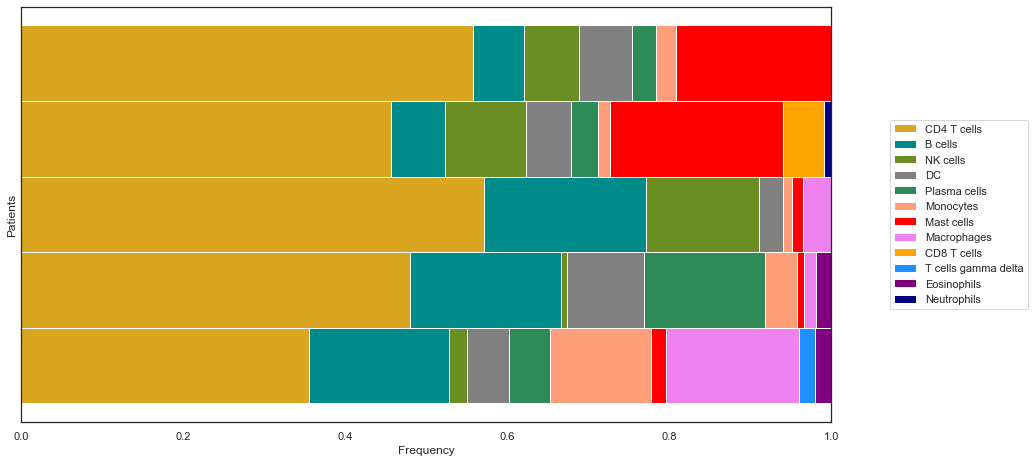

In [13]:
td.cell_frequency_barchart(immune_profiles)

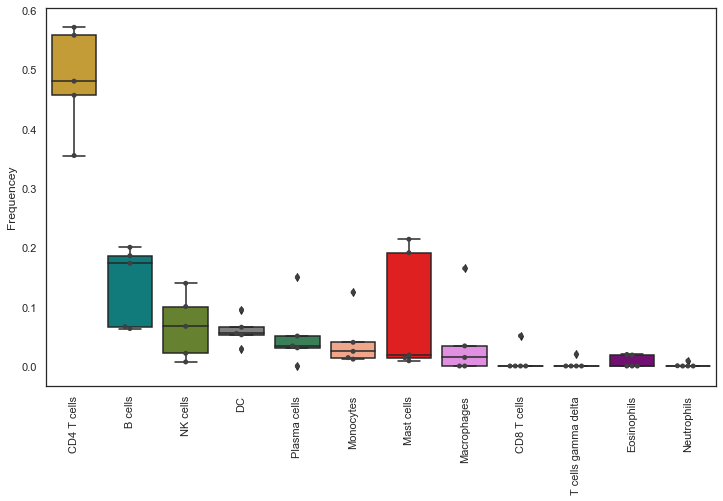

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
td.cell_frequency_boxplot(immune_profiles)

In [15]:
["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_0","NCI_BAP1_-1"]

['SNU_Original_cell_line', 'SNU_KO1', 'SNU_KO2', 'NCI_BAP1_0', 'NCI_BAP1_-1']

(0.9786694472351962, 0.02133055276480378)


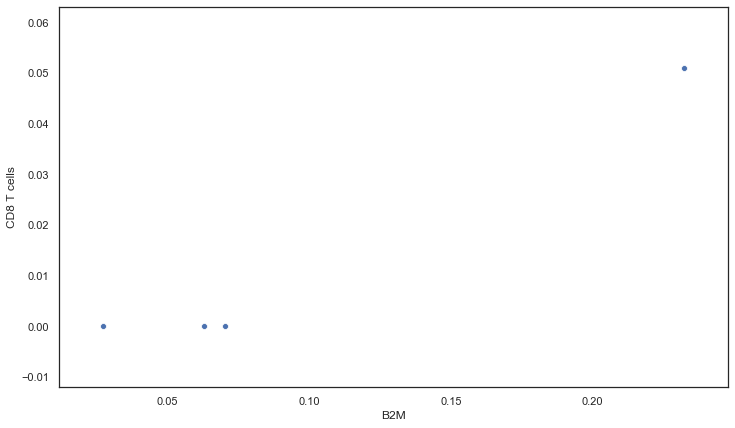

In [16]:
print(pearsonr(human_expression.T.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"B2M"],immune_profiles_comb.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD8 T cells"]))
sns.scatterplot(human_expression.T.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"B2M"],immune_profiles_comb.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD8 T cells"])

(0.9836590143518653, 0.016340985648134687)


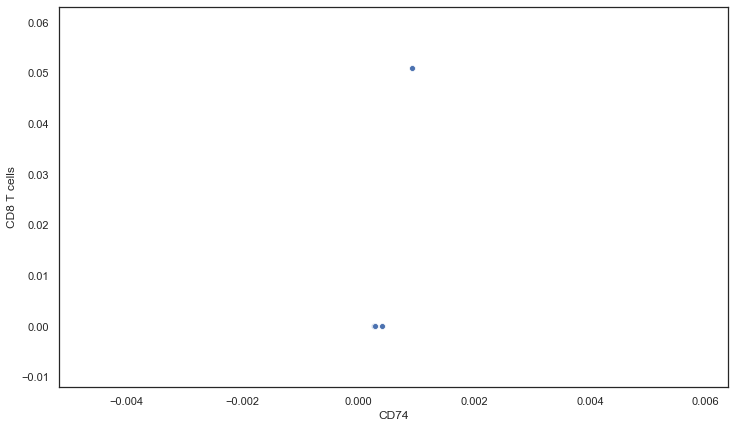

In [17]:
print(pearsonr(human_expression.T.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD74"],immune_profiles_comb.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD8 T cells"]))
sns.scatterplot(human_expression.T.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD74"],immune_profiles_comb.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD8 T cells"])

(0.9999544047652409, 4.5595234759110426e-05)


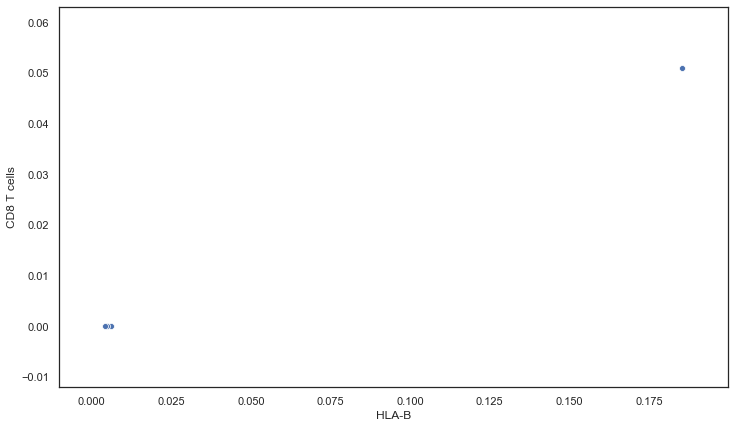

In [18]:
print(pearsonr(human_expression.T.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"HLA-B"],immune_profiles_comb.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD8 T cells"]))
sns.scatterplot(human_expression.T.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"HLA-B"],immune_profiles_comb.loc[["SNU_Original_cell_line","SNU_KO1","SNU_KO2","NCI_BAP1_-1"],"CD8 T cells"])

The NCI BAP1 -1 patient seems to be quite the outlier. Given that we only use the 4 other points the correlation between the cells of interest and the patients CD8 T cell fraction still holds all with very low p values.

There seem to be huge differences between the SNU patients and the NCIB patients just in general. But maybe this is to be expected because theres just noise. But definitley  a question. Might help to seperate patients.

In [19]:
pca = PCA(n_components=2)
transformed = pca.fit_transform(human_expression.T.values)
print(sum(pca.explained_variance_ratio_))

0.9389517536435621


In [20]:
transformed

array([[-0.74267331, -0.40156504],
       [-0.63354862, -0.05028086],
       [-0.03498416,  0.92465265],
       [ 0.52607124, -0.33631623],
       [ 0.88513485, -0.13649052]])

In [21]:
human_expression

,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
Gene Name,,,,,
A1BG-AS1,0.000005,0.000003,0.000000,0.000054,0.000131
A2M,0.000031,0.000091,0.000056,0.000091,0.000169
A4GALT,0.000665,0.000256,0.000134,0.000232,0.000397
AAAS,0.002200,0.002209,0.005648,0.002577,0.003396
AACS,0.001394,0.001654,0.002319,0.001998,0.002292
...,...,...,...,...,...
ZXDC,0.000500,0.000807,0.001282,0.000960,0.001241
ZYG11A,0.000699,0.000814,0.001405,0.000000,0.000000
ZYG11B,0.001789,0.001930,0.004377,0.002093,0.002852


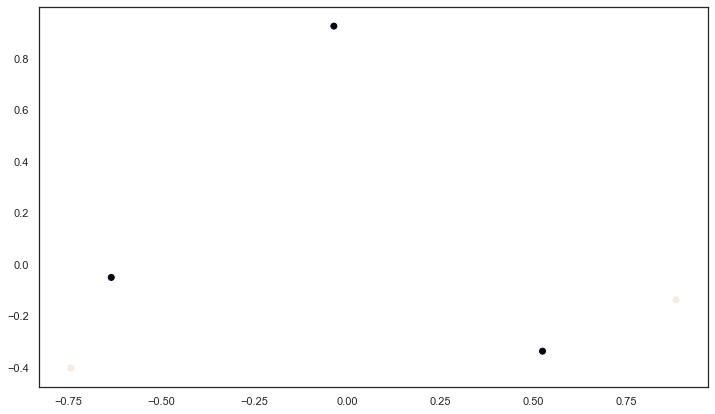

In [22]:
plt.scatter(transformed[:,0], transformed[:,1], c=[0,-1,-1,-1,0])

The split between the two studies seems to be a more significant than the BAP1 mutation removal

In [23]:
def distance(a,b):
    return np.linalg.norm(a-b)

study_distance = [distance(transformed[4],transformed[2]),distance(transformed[4],transformed[1]),distance(transformed[4],transformed[0]),distance(transformed[3],transformed[2]),distance(transformed[3],transformed[1]),distance(transformed[3],transformed[0])]
bap1_distance = [distance(transformed[0],transformed[1]),distance(transformed[0],transformed[2]),distance(transformed[0],transformed[3]),distance(transformed[4],transformed[3]),distance(transformed[4],transformed[2]),distance(transformed[4],transformed[1])]

mannwhitneyu(study_distance,bap1_distance)

MannwhitneyuResult(statistic=13.5, pvalue=0.2598205920636065)

In [24]:
sum(study_distance)/len(study_distance),sum(bap1_distance)/len(bap1_distance)

(1.4033063271884485, 1.0796743146535992)

The average distance between points between studies is greater than that between BAP1 patients, what we may be seeing is some sort of study based bias probably. This kind of throws off results between studies because there are differences which are being taken into account when we assume they are identically distributes but they seem to be a bit off. 

In [25]:
gsea_postdoc_df = pd.DataFrame(data=human_expression.values)
gsea_postdoc_df.columns = human_expression.columns
gsea_postdoc_df['NAME'] = human_expression.index
gsea_postdoc_df['DESCRIPTION'] = np.nan
gsea_postdoc_df.index = gsea_postdoc_df["NAME"]
gsea_postdoc_df = gsea_postdoc_df[["DESCRIPTION","SNU_KO1","SNU_KO2","NCI_BAP1_-1","NCI_BAP1_0","SNU_Original_cell_line"]]
gsea_postdoc_df.head()

,DESCRIPTION,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0,SNU_Original_cell_line
NAME,,,,,,
A1BG-AS1,NaN,0.000003,0.000000,0.000054,0.000131,0.000005
A2M,NaN,0.000091,0.000056,0.000091,0.000169,0.000031
A4GALT,NaN,0.000256,0.000134,0.000232,0.000397,0.000665
AAAS,NaN,0.002209,0.005648,0.002577,0.003396,0.002200
AACS,NaN,0.001654,0.002319,0.001998,0.002292,0.001394


In [26]:
gsea_postdoc_df.to_csv("../data/PostdocGsea.txt",sep='\t')

In [27]:
mannwhitneyu(immune_profiles_comb.loc[["SNU_KO1","SNU_KO2"],"Macrophages"],immune_profiles_comb.loc[["SNU_Original_cell_line"], "Macrophages"])

MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)

In [28]:
immune_profiles_comb.loc["SNU_Original_cell_line", "Macrophages"]

0.16461088661490603

## Mouse Analysis

In [62]:
mouse_espression_most_var = td.variance_threshold_selector(mouse_espression, threshold=.0000001)
print(mouse_espression.shape,mouse_espression_most_var.shape)

(14702, 3) (7651, 3)


In [63]:
mouse_espression_most_var.head()

,B162E10,B164F7,B16
Gene Name,,,
0610009B22RIK,0.004627,0.005598,0.005379
1110002L01RIK,0.002891,0.003404,0.004850
1110004F10RIK,0.023092,0.023372,0.026913
1110012L19RIK,0.002583,0.002390,0.003418
1110019D14RIK,0.001097,0.000848,0.001824


In [64]:
mouse_espression_most_var.index

Index(['0610009B22RIK', '1110002L01RIK', '1110004F10RIK', '1110012L19RIK',
       '1110019D14RIK', '1110038B12RIK', '1110038F14RIK', '1110051M20RIK',
       '1110059E24RIK', '1600014C10RIK',
       ...
       'ZSWIM6', 'ZSWIM7', 'ZSWIM8', 'ZWINT', 'ZXDB', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Gene Name', length=7651)

In [65]:
bap1_groups = [[i for i in list(mouse_espression_most_var.columns) if combined_df.loc[i,"Mutation"] == m] for m in [0,-1]]

In [66]:
most_difference = []
for gene in list(mouse_espression_most_var.index):
    average_dist = []
    for b in bap1_groups[1]:
        #print(abs(combined_df_var.loc[gene,bap1_groups[0]].values - combined_df_var.loc[gene,b]))
        average_dist.extend(abs(mouse_espression_most_var.loc[gene,bap1_groups[0]].values - mouse_espression_most_var.loc[gene,b]))
    most_difference.append((gene, sum(average_dist)/len(average_dist)))
most_difference = sorted(most_difference, key= lambda g: g[1], reverse=False)

In [67]:
most_difference[:10]

[('AZGP1', 0.00034175635538579883),
 ('GM11221', 0.0003436307203822813),
 ('WNK4', 0.00034645561342624845),
 ('ANKZF1', 0.0003483832330668363),
 ('BDH1', 0.0003500190254115184),
 ('SPSB4', 0.00035114898262910506),
 ('GM2260', 0.0003516031963063686),
 ('HIKESHI', 0.00035205014614507046),
 ('VANGL1', 0.00035631417185391276),
 ('CETN2', 0.00035706076607878957)]

## Combined Analysis

In [32]:
print(sum([1 for i in list(mouse_espression_most_var.index) if i in list(human_variance_threshold.index)])/len(mouse_espression_most_var))

0.35714285714285715


In [33]:
[i for i in list(mouse_espression_most_var.index) if i in list(human_variance_threshold.index)]

['EEF2', 'HSP90AA1', 'HSP90AB1', 'MT-CO1', 'PKM']

In [170]:
combined_df = td.df_normalization(combined_df,"minmax").T

combined_df['Mutation'] = [-1,-1,0,0,-1,-1,-1,0]


In [171]:
combined_df = combined_df.T
combined_df.head()

,B162E10,B164F7,B16,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
Gene Name,,,,,,,,
AAAS,0.008887,0.005159,0.006039,0.002200,0.002209,0.005648,0.002577,0.003396
AACS,0.004859,0.002182,0.001930,0.001394,0.001654,0.002319,0.001998,0.002292
AAGAB,0.006629,0.005764,0.005977,0.002370,0.003222,0.004120,0.006722,0.006973
AAK1,0.015772,0.007787,0.011829,0.000984,0.002139,0.003100,0.002267,0.002460
AAMDC,0.000424,0.000433,0.000405,0.000345,0.000242,0.000295,0.000298,0.000343


20% of the most variant 35 genes overlap which is interesting. Some of which lie along the Innate Immune System such as PKM, HSP90AB1,HSP90AB1 

In [177]:
pca = PCA(n_components=3)
transformed = pca.fit_transform(combined_df.T.values)
print(sum(pca.explained_variance_ratio_))

0.86970514584944


In [178]:
bap1_groups = [[i for i in list(combined_df.columns) if combined_df.T.loc[i,"Mutation"] == m] for m in [0,-1]]

In [179]:
transformed.shape

(8, 3)

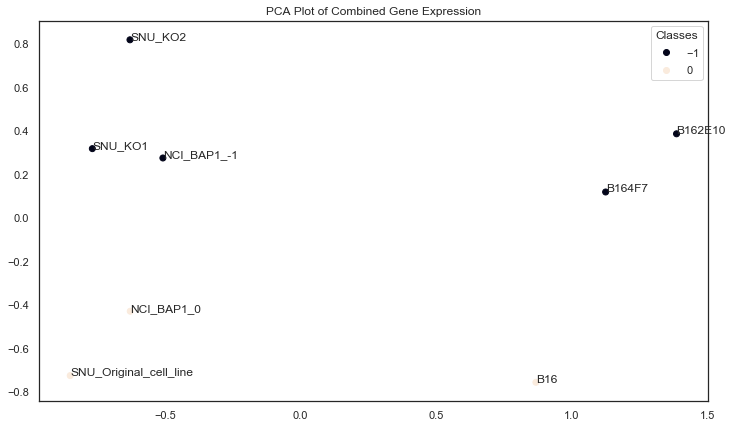

In [181]:
fig, ax = plt.subplots()
scatter = ax.scatter(transformed[:,0], transformed[:,1], c=[-1,-1,0,0,-1,-1,-1,0],label=[-1,-1,0,0,-1,-1,-1,0])
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
plt.title("PCA Plot of Combined Gene Expression")
for i, txt in enumerate(combined_df.columns):
    ax.annotate(txt, (transformed[i,0], transformed[i,1]))

In [188]:
combined_df_var = td.variance_threshold_selector(combined_df,threshold=.001)
combined_df_var.head()

,B162E10,B164F7,B16,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
Gene Name,,,,,,,,
ACTB,0.129374,0.076805,0.067884,0.197747,0.401092,0.720055,0.184780,0.320531
ACTG1,0.102074,0.041395,0.055103,0.105288,0.207118,0.305864,0.127543,0.207452
ACTN4,0.029292,0.009595,0.012881,0.046267,0.061848,0.181703,0.036293,0.060467
ALDH1A1,0.000000,0.000065,0.000012,0.108195,0.010620,0.013057,0.000000,0.000000
ALDH1A3,0.000035,0.000036,0.000056,0.000379,0.004708,0.004577,0.050729,0.099581


In [189]:
combined_df_var.shape

(140, 8)

In [193]:
combined_df.loc["BAP1",bap1_groups[0]].mean(),combined_df.loc["BAP1",bap1_groups[1]].mean()

(0.002107934839953585, 0.00536629532574172)

In [195]:
transformed_df = pd.DataFrame(data=transformed[:,0:2]).T
transformed_df.columns = combined_df.columns

transformed_df.head()

,B162E10,B164F7,B16,SNU_Original_cell_line,SNU_KO1,SNU_KO2,NCI_BAP1_-1,NCI_BAP1_0
0,1.385529,1.124335,0.867484,-0.848311,-0.766806,-0.628194,-0.506903,-0.627134
1,0.385895,0.118166,-0.757501,-0.726779,0.317634,0.818478,0.274627,-0.430521


In [197]:
most_corr = []
x = transformed_df.loc[1,:]
for gene in list(combined_df_var.index):
    most_corr.append((gene,pearsonr(x,combined_df.loc[gene,:])[0],abs(pearsonr(x,combined_df.loc[gene,:])[0])))
    most_corr = sorted(most_corr, key= lambda g: g[2], reverse=True)

In [198]:
most_corr[:15]

[('Mutation', -0.9227700784618081, 0.9227700784618081),
 ('SLC7A5', 0.70187074618897, 0.70187074618897),
 ('AP2B1', 0.6553079284319012, 0.6553079284319012),
 ('RPS14', -0.6208500258903203, 0.6208500258903203),
 ('HMGA1', 0.6190241370789338, 0.6190241370789338),
 ('ENO1', 0.6089028080804892, 0.6089028080804892),
 ('HSP90AA1', 0.6035673796827012, 0.6035673796827012),
 ('MYH9', 0.5971729053225597, 0.5971729053225597),
 ('PABPC1', 0.5922840770943396, 0.5922840770943396),
 ('HSP90AB1', 0.5904101625766278, 0.5904101625766278),
 ('FLNA', 0.5879958912069905, 0.5879958912069905),
 ('PYGB', 0.5864439607719254, 0.5864439607719254),
 ('ACTB', 0.5648135121464497, 0.5648135121464497),
 ('ACTN4', 0.5519106924805497, 0.5519106924805497),
 ('COTL1', 0.5367339193008343, 0.5367339193008343)]

In [212]:
pearsonr(x,combined_df.loc["HSP90AA1",:])

(0.6035673796827012, 0.113118573406183)

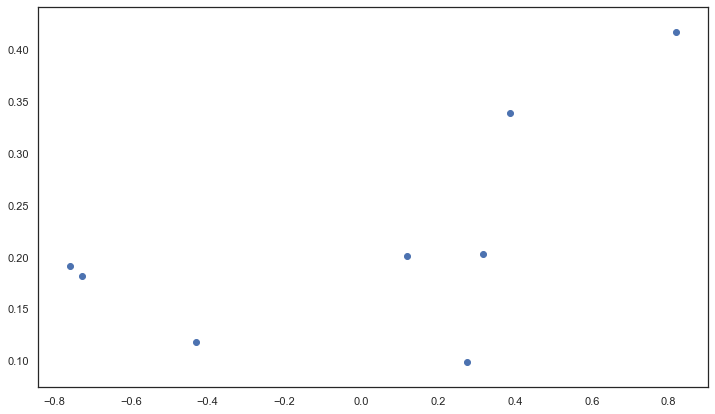

In [213]:
plt.scatter(x,combined_df.loc["HSP90AA1",:])

In [214]:
mdg = [l[0] for l in most_corr[:20]]
bof = [gene for gene in most_difference if gene[0] in mdg]

In [215]:
bof

[('Mutation', 1.0),
 ('ACTB', 0.21008933088447704),
 ('FLNA', 0.1163055467093288),
 ('HSP90AA1', 0.11438324616736005),
 ('ACTG1', 0.09185029030769942),
 ('MYH9', 0.09056759895005838),
 ('HSP90AB1', 0.08415118163761401),
 ('ITGB1', 0.08379096621688321),
 ('ENO1', 0.08313272044254463),
 ('RPS14', 0.06139920032436415),
 ('MT-ND5', 0.05756369204731486),
 ('ACTN4', 0.046958195329642065),
 ('PABPC1', 0.04607943710019818),
 ('SPP1', 0.0421897124968136),
 ('ASPH', 0.037888394711349624),
 ('HMGA1', 0.0368181013129459),
 ('COTL1', 0.03344987190274484),
 ('SLC7A5', 0.032476772029130074),
 ('AP2B1', 0.0288626369452412),
 ('PYGB', 0.026309632643449887)]

In [204]:
most_difference = []
for gene in list(combined_df_var.index):
    average_dist = []
    for b in bap1_groups[1]:
        #print(abs(combined_df_var.loc[gene,bap1_groups[0]].values - combined_df_var.loc[gene,b]))
        average_dist.extend(abs(combined_df_var.loc[gene,bap1_groups[0]].values - combined_df_var.loc[gene,b]))
    most_difference.append((gene, sum(average_dist)/len(average_dist)))
most_difference = sorted(most_difference, key= lambda g: g[1], reverse=True)

In [205]:
most_difference[1:20]

[('MT-RNR2', 0.3952776463566678),
 ('TYRP1', 0.3486743146097559),
 ('SQSTM1', 0.23344231685562208),
 ('FTH1', 0.23140772641620205),
 ('HSPA5', 0.2117416232406611),
 ('ACTB', 0.21008933088447704),
 ('MT-CO1', 0.20921605474767316),
 ('GPNMB', 0.2077542812964628),
 ('UBB', 0.16749397962256227),
 ('HMOX1', 0.1460849727331371),
 ('EEF2', 0.13197001906651692),
 ('SERPINE1', 0.12915331103851627),
 ('ANXA2', 0.124574195688278),
 ('TMSB4X', 0.12143548248816834),
 ('B2M', 0.1203018712685502),
 ('FLNA', 0.1163055467093288),
 ('SPARC', 0.11453177646515042),
 ('HSP90AA1', 0.11438324616736005),
 ('PMEL', 0.11269966830236194)]

Interesting genes are FTH1 which is along the innate immune system ans also has significant differences in BAP1 groups in my other analysis with high correlation with mortality rate.

SQSTM1-

Autophagy receptor required for selective macroautophagy (aggrephagy). Functions as a bridge between polyubiquitinated cargo and autophagosomes. Interacts directly with both the cargo to become degraded and an autophagy modifier of the MAP1 LC3 family (PubMed:16286508, PubMed:20168092, PubMed:24128730, PubMed:28404643, PubMed:22622177). Along with WDFY3, involved in the formation and autophagic degradation of cytoplasmic ubiquitin-containing inclusions (p62 bodies, ALIS/aggresome-like induced structures). Along with WDFY3, required to recruit ubiquitinated proteins to PML bodies in the nucleus (PubMed:24128730, PubMed:20168092). May regulate the activation of NFKB1 by TNF-alpha, nerve growth factor (NGF) and interleukin-1. May play a role in titin/TTN downstream signaling in muscle cells. May regulate signaling cascades through ubiquitination. Adapter that mediates the interaction between TRAF6 and CYLD (By similarity). May be involved in cell differentiation, apoptosis, immune response and regulation of K(+) channels. Involved in endosome organization by retaining vesicles in the perinuclear cloud: following ubiquitination by RNF26, attracts specific vesicle-associated adapters, forming a molecular bridge that restrains cognate vesicles in the perinuclear region and organizes the endosomal pathway for efficient cargo transport (PubMed:27368102). Promotes relocalization of 'Lys-63'-linked ubiquitinated TMEM173/STING to autophagosomes (PubMed:29496741). Acts as an activator of the NFE2L2/NRF2 pathway via interaction with KEAP1: interaction inactivates the BCR(KEAP1) complex, promoting nuclear accumulation of NFE2L2/NRF2 and subsequent expression of cytoprotective genes (PubMed:20452972, PubMed:28380357).
Mentions immune

FTH1-

FTH1 (Ferritin Heavy Chain 1) is a Protein Coding gene. Diseases associated with FTH1 include Hemochromatosis, Type 5 and Superficial Siderosis Of The Central Nervous System. Among its related pathways are Innate Immune System and Clathrin derived vesicle budding. Gene Ontology (GO) annotations related to this gene include iron ion binding and ferroxidase activity. An important paralog of this gene is FTMT.
Mentions Immune

FLNA-

Plays an important role in the organization of the cytoskeleton (By similarity). Binds to and sequesters actin monomers (G actin) and therefore inhibits actin polymerization. TYB4_HUMAN,P62328
Seraspenide inhibits the entry of hematopoietic pluripotent stem cells into the S-phase. TYB4_HUMAN,P62328
Mentioned stem cells

SERPINE1- 

Serine protease inhibitor. Inhibits TMPRSS7 (PubMed:15853774). Is a primary inhibitor of tissue-type plasminogen activator (PLAT) and urokinase-type plasminogen activator (PLAU). As PLAT inhibitor, it is required for fibrinolysis down-regulation and is responsible for the controlled degradation of blood clots (PubMed:8481516, PubMed:9207454, PubMed:17912461). As PLAU inhibitor, it is involved in the regulation of cell adhesion and spreading (PubMed:9175705). Acts as a regulator of cell migration, independently of its role as protease inhibitor (PubMed:15001579, PubMed:9168821). It is required for stimulation of keratinocyte migration during cutaneous injury repair (PubMed:18386027). It is involved in cellular and replicative senescence (PubMed:16862142). Plays a role in alveolar type 2 cells senescence in the lung (By similarity). Is involved in the regulation of cementogenic differentiation of periodontal ligament stem cells, and regulates odontoblast differentiation and dentin formation during odontogenesis (PubMed:25808697, PubMed:27046084)
Talks about stem cells

B2M-

Component of the class I major histocompatibility complex (MHC). Involved in the presentation of peptide antigens to the immune system. Exogenously applied M.tuberculosis EsxA or EsxA-EsxB (or EsxA expressed in host) binds B2M and decreases its export to the cell surface (total protein levels do not change), probably leading to defects in class I antigen presentation (PubMed:25356553). B2MG_HUMAN,P61769
Talks About Immune system

PKM-

Glycolytic enzyme that catalyzes the transfer of a phosphoryl group from phosphoenolpyruvate (PEP) to ADP, generating ATP. Stimulates POU5F1-mediated transcriptional activation. Plays a general role in caspase independent cell death of tumor cells. The ratio between the highly active tetrameric form and nearly inactive dimeric form determines whether glucose carbons are channeled to biosynthetic processes or used for glycolytic ATP production. The transition between the 2 forms contributes to the control of glycolysis and is important for tumor cell proliferation and survival (PubMed:17308100, PubMed:18191611, PubMed:21620138). Promotes in a STAT1-dependent manner, the expression of the immune checkpoint protein CD274 in ARNTL/BMAL1-deficient macrophages (By similarity). KPYM_HUMAN,P14618

ANXA2-

ANXA2 (Annexin A2) is a Protein Coding gene. Diseases associated with ANXA2 include Antiphospholipid Syndrome and Acute Promyelocytic Leukemia. Among its related pathways are Innate Immune System and Cardiac conduction. Gene Ontology (GO) annotations related to this gene include Rab GTPase binding. An important paralog of this gene is ANXA1.
Mentioned Immune System

## Find Genes That increase and decrease between BAP1 Null and BAP1 WT

In [293]:
l = []
for gene in list(combined_df.index):
    m1,m2 = np.mean(combined_df.loc[gene,bap1_groups[0]].values),np.mean(combined_df.loc[gene,bap1_groups[1]].values)
    l.append([m2,m1,m2-m1])
mean_df = pd.DataFrame(data=l, index = combined_df.index,columns = ["BAP1 -1","BAP1 0","Diff"])
mean_df.head()

,BAP1 -1,BAP1 0,Diff
Gene Name,,,
AAAS,0.004896,0.003879,0.001018
AACS,0.002603,0.001872,0.000731
AAGAB,0.005291,0.005106,0.000185
AAK1,0.006213,0.005091,0.001122
AAMDC,0.000338,0.000364,-0.000026


In [294]:
l = []
for gene in list(combined_df.index):
    m1,m2 = np.median(combined_df.loc[gene,bap1_groups[0]].values),np.median(combined_df.loc[gene,bap1_groups[1]].values)
    l.append([m2,m1,m2-m1])
median_df = pd.DataFrame(data=l, index = combined_df.index,columns = ["BAP1 -1","BAP1 0","Diff"])
median_df.head()

,BAP1 -1,BAP1 0,Diff
Gene Name,,,
AAAS,0.005159,0.003396,0.001763
AACS,0.002182,0.001930,0.000252
AAGAB,0.005764,0.005977,-0.000212
AAK1,0.003100,0.002460,0.000640
AAMDC,0.000298,0.000345,-0.000048


In [313]:
mean_df = mean_df.sort_values("Diff",ascending=True)
mean_df.head(20)

,BAP1 -1,BAP1 0,Diff
Gene Name,,,
Mutation,-1.000000,0.000000,-1.000000
MT-CO1,0.348045,0.418559,-0.070515
B2M,0.071487,0.127365,-0.055878
MT-RNR2,0.349894,0.402856,-0.052962
TMSB4X,0.056900,0.109596,-0.052696
SERPINE1,0.065049,0.115415,-0.050366
SPARC,0.070969,0.120850,-0.049880
SPP1,0.000534,0.042056,-0.041523
RPS14,0.123258,0.160849,-0.037591


In [314]:
median_df = median_df.sort_values("Diff",ascending=True)
median_df.head(20)

,BAP1 -1,BAP1 0,Diff
Gene Name,,,
Mutation,-1.000000,0.000000,-1.000000
MT-CO1,0.347217,0.482974,-0.135757
MT-ND5,0.074293,0.137371,-0.063077
RPS14,0.126431,0.181545,-0.055114
MT-ND4,0.103560,0.156207,-0.052647
RPL13A,0.188179,0.232336,-0.044156
FSTL1,0.014111,0.051084,-0.036973
B2M,0.027179,0.062877,-0.035698
RPS6,0.113088,0.148076,-0.034988


In [315]:
intersection = [gene for gene in list(median_df.index)[:30] if gene in list(mean_df.index)[:30]]
median_df.loc[intersection,:].head(50)

,BAP1 -1,BAP1 0,Diff
Gene Name,,,
Mutation,-1.000000,0.000000,-1.000000
MT-CO1,0.347217,0.482974,-0.135757
MT-ND5,0.074293,0.137371,-0.063077
RPS14,0.126431,0.181545,-0.055114
MT-ND4,0.103560,0.156207,-0.052647
RPL13A,0.188179,0.232336,-0.044156
FSTL1,0.014111,0.051084,-0.036973
B2M,0.027179,0.062877,-0.035698
ANXA1,0.020444,0.051791,-0.031346


In [316]:
mean_df.loc[intersection,"Diff"].head(15)

Gene Name
Mutation   -1.000000
MT-CO1     -0.070515
MT-ND5     -0.028578
RPS14      -0.037591
MT-ND4     -0.026756
RPL13A     -0.019734
FSTL1      -0.032902
B2M        -0.055878
ANXA1      -0.020968
RPS18      -0.020498
ITGB4      -0.022677
VIM        -0.015309
THBS1      -0.024409
TMSB10     -0.023156
Name: Diff, dtype: float64

In [285]:
ind = list(mean_df.index)
top_20_bap1_higher = ind[0:21]
top_20_bap1_lower = ind[-20:-1]

In [286]:
print(top_20_bap1_higher)
print(top_20_bap1_lower)

['TYRP1', 'EEF2', 'ACTB', 'HSP90AA1', 'FTH1', 'SQSTM1', 'GPNMB', 'FLNA', 'HSP90AB1', 'MYH9', 'ITGB1', 'PMEL', 'UBC', 'HMOX1', 'HSPA8', 'ENO1', 'HSPD1', 'ACTG1', 'NCL', 'CLTC', 'EIF3A']
['RPS18', 'ANXA1', 'ALDH1A3', 'ITGB4', 'TMSB10', 'THBS1', 'MT-ND4', 'MT-ND5', 'ALDH1A1', 'FSTL1', 'ANXA2', 'RPS14', 'SPP1', 'SPARC', 'SERPINE1', 'TMSB4X', 'MT-RNR2', 'B2M', 'MT-CO1']


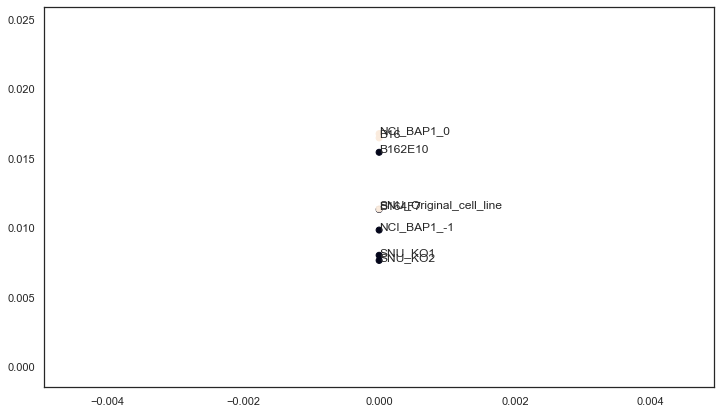

In [371]:
fig, ax = plt.subplots()
scatter = ax.scatter([0,0,0,0,0,0,0,0], combined_df.loc["PFN2",:],c=[-1,-1,0,0,-1,-1,-1,0],label=[-1,-1,0,0,-1,-1,-1,0])
for i, txt in enumerate(combined_df.columns):
    ax.annotate(txt, (0, combined_df.loc["PFN2",combined_df.columns[i]]))

In [320]:
for gene in intersection:
    print(gene, mannwhitneyu(combined_df.loc[gene,bap1_groups[0]],combined_df.loc[gene,bap1_groups[1]]))

Mutation MannwhitneyuResult(statistic=0.0, pvalue=0.00676759930690142)
MT-CO1 MannwhitneyuResult(statistic=6.0, pvalue=0.382797241997882)
MT-ND5 MannwhitneyuResult(statistic=5.0, pvalue=0.2754924937925467)
RPS14 MannwhitneyuResult(statistic=5.0, pvalue=0.2754924937925467)
MT-ND4 MannwhitneyuResult(statistic=6.0, pvalue=0.382797241997882)
RPL13A MannwhitneyuResult(statistic=5.0, pvalue=0.2754924937925467)
FSTL1 MannwhitneyuResult(statistic=5.0, pvalue=0.2754924937925467)
B2M MannwhitneyuResult(statistic=7.0, pvalue=0.5)
ANXA1 MannwhitneyuResult(statistic=5.0, pvalue=0.2754924937925467)
RPS18 MannwhitneyuResult(statistic=7.0, pvalue=0.5)
ITGB4 MannwhitneyuResult(statistic=5.0, pvalue=0.2754924937925467)
VIM MannwhitneyuResult(statistic=5.0, pvalue=0.2754924937925467)
THBS1 MannwhitneyuResult(statistic=7.0, pvalue=0.5)
TMSB10 MannwhitneyuResult(statistic=4.0, pvalue=0.18554668476134878)


In [367]:
l = []
for gene in list(combined_df.index):
    if gene != 'TBCE':
        m1,m2 = combined_df.loc[gene,bap1_groups[0]].values,combined_df.loc[gene,bap1_groups[1]].values
        l.append([np.median(m2),np.median(m1),mannwhitneyu(m1,m2)[1]])
p_val = pd.DataFrame(data=l, index = [g for g in list(combined_df.index) if g != 'TBCE'],columns = ["BAP1 -1","BAP1 0","P_val"])
p_val.head()

,BAP1 -1,BAP1 0,P_val
AAAS,0.005159,0.003396,0.382797
AACS,0.002182,0.001930,0.185547
AAGAB,0.005764,0.005977,0.500000
AAK1,0.003100,0.002460,0.382797
AAMDC,0.000298,0.000345,0.382797


In [368]:
p_val['Diff'] = mean_df.loc[p_val.index,"Diff"].values
p_val.head()

,BAP1 -1,BAP1 0,P_val,Diff
AAAS,0.005159,0.003396,0.382797,0.001018
AACS,0.002182,0.001930,0.185547,0.000731
AAGAB,0.005764,0.005977,0.500000,0.000185
AAK1,0.003100,0.002460,0.382797,0.001122
AAMDC,0.000298,0.000345,0.382797,-0.000026


In [369]:
p_val = p_val[p_val.P_val < .05]
p_val = p_val.sort_values("Diff",ascending=False)
p_val.head(50)

,BAP1 -1,BAP1 0,P_val,Diff
MAP2K2,0.014933,0.008752,0.036819,0.006774
DAZAP1,0.011054,0.006973,0.036819,0.006093
NOP53,0.014320,0.010161,0.036819,0.004713
RPL23A,0.025169,0.021272,0.036819,0.004267
DRAP1,0.013967,0.012264,0.036819,0.004150
DPP7,0.009009,0.006067,0.036819,0.003121
MRPL37,0.006185,0.004819,0.018444,0.002629
MKNK2,0.006678,0.004714,0.036819,0.002455
TRIR,0.007818,0.007299,0.036819,0.002378
NDUFS8,0.005631,0.004365,0.036819,0.002299


In [366]:
p_val.loc[intersection,:].head(40)

,BAP1 -1,BAP1 0,P_val,Diff
Mutation,-1.0,0.0,0.006768,-1.0
MT-CO1,NaN,NaN,NaN,NaN
MT-ND5,NaN,NaN,NaN,NaN
RPS14,NaN,NaN,NaN,NaN
MT-ND4,NaN,NaN,NaN,NaN
RPL13A,NaN,NaN,NaN,NaN
FSTL1,NaN,NaN,NaN,NaN
B2M,NaN,NaN,NaN,NaN
ANXA1,NaN,NaN,NaN,NaN
RPS18,NaN,NaN,NaN,NaN
